Se debe diseñar un canal hidráulico trapezoidal (ver figura) que sirva como medio de transporte de agua para un sistema de riego. El caudal (de agua) es una medida de cuanto volumen por unidad de tiempo atraviesa una superficie del canal y se mide en $\frac{m^{3}}{s}$. Se desea obtener los siguientes parámetros:


- Caudal (Q) = 10 m³/s
- Pendiente del fondo (S) = 0.001 (Me mide cuanta pendiente tiene el río al bajar. Me mide el cociente entre la diferencia de altura a lo largo de una distancia recorrida $\frac{\Delta h}{L}$. En este caso es que baja 1 metro cada 1000 metros recorridos. Por ejemplo el del río santa cruz es de 0.005)
- Coeficiente de rugosidad de Manning (n) = 0.025
- Talud lateral (m) = 1.5 (relación horizontal:vertical, me indica cuan empinado es el trapezio en la sección transversal)
- Ancho del fondo (b) = 3 m


**Se necesita encontrar la profundidad normal (y) del agua en el canal usando la ecuación de Manning**  (https://es.wikipedia.org/wiki/F%C3%B3rmula_de_Manning) que proviene de datos experimentales se obtiene:

$$Q = \frac{1}{n} \cdot A \cdot R^{2/3} \cdot S^{1/2}$$
y Donde:
- A = Área hidráulica = $y(b + my) = y(3 + 1.5y)$
- P = Perímetro mojado = $b + 2y\sqrt{1 + m^2} = 3 + 2y\sqrt{1 + 1.5^2} = 3 + 3.606y$
- R = Radio hidráulico = A/P (que es el área efectiva por el que circula agua en comparación al áréa total de la superficie. Un R chico implica que hay poco contacto del agua con la superficie, mientras que uno grande es que hay mucho contacto)

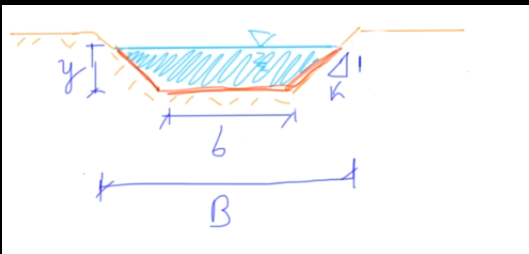


**Solución**
Sustituyendo los valores dados en la ecuación de Manning:
$$10 = \frac{1}{0.025} \cdot y(3 + 1.5y) \cdot \left(\frac{y(3 + 1.5y)}{3 + 3.606y}\right)^{2/3} \cdot (0.001)^{1/2}$$

Simplificando:
$$10 = 40 \cdot y(3 + 1.5y) \cdot \left(\frac{y(3 + 1.5y)}{3 + 3.606y}\right)^{2/3} \cdot 0.0316$$

$$10 = 1.265 \cdot y(3 + 1.5y) \cdot \left(\frac{y(3 + 1.5y)}{3 + 3.606y}\right)^{2/3}$$

Definimos la función:
$$f(y) = 1.265 \cdot y(3 + 1.5y) \cdot \left(\frac{y(3 + 1.5y)}{3 + 3.606y}\right)^{2/3} - 10 = 0$$

Para convertir a forma de punto fijo $y = g(y)$, despejamos:
$$g(y) = \frac{10}{1.265 \cdot (3 + 1.5y) \cdot \left(\frac{y(3 + 1.5y)}{3 + 3.606y}\right)^{2/3}}$$




Para canales trapezoidales típicos, la profundidad normal suele estar entre 1 y 4 metros. Tomamos $[a,b] = [2, 4]$ y además, g es una función decreciente en el intervalo

- $g(1.5) \approx 1.573063$
- $g(1.55)  \approx 1.524500$

Calculamos la derivada:


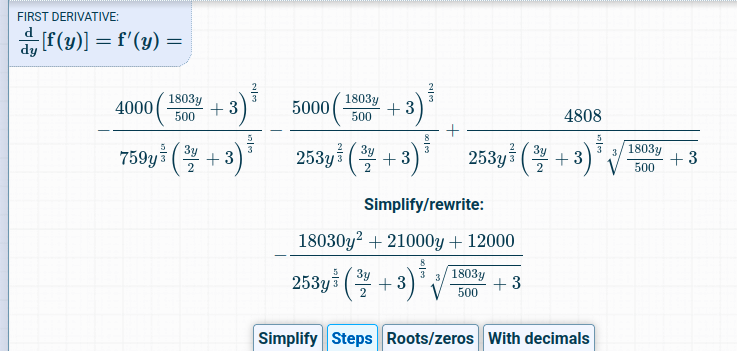


La derivada es creciente y chequeamos que:
-$g^{\prime}(1.5) = --0.99850\leq 1$. Y se cumplen las hipotesis de punto fijo.



Solución: y = 1.53693346 m
Converge en 430 iteraciones
Error final: 9.62e-09
Orden de convergencia: 1.003


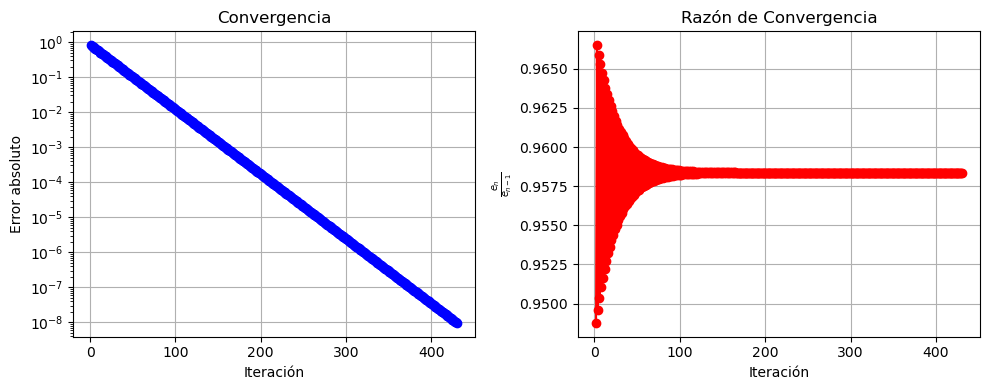

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def g(y):
    """Función de iteración para punto fijo"""
    A = y * (3 + 1.5 * y)
    P = 3 + 3.606 * y
    R = A / P
    denominator = 1.265 * (3 + 1.5 * y) * (R**(2/3))
    return 10 / denominator

def punto_fijo(g, y0, tol=1e-8, max_iter=1000):
    """Método de punto fijo simple"""
    y = y0
    errores = []
    
    for i in range(max_iter):
        y_new = g(y)
        error = abs(y_new - y)
        errores.append(error)
        
        if error < tol:
            return y_new, errores, i+1
        
        y = y_new
    
    return y, errores, max_iter

def analizar_convergencia(errores):
    """Calcula el orden de convergencia"""
    n = len(errores)
    if n < 5:
        return None
    
    ordenes = []
    for i in range(3, n-1):
        if errores[i-2] > 0 and errores[i-1] > 0 and errores[i] > 0:
            orden = np.log(errores[i] / errores[i-1]) / np.log(errores[i-1] / errores[i-2])
            if not np.isnan(orden) and 0 < orden < 3:
                ordenes.append(orden)
    
    return np.mean(ordenes) if ordenes else None

# Ejecutar el método
y0 = 2.0  # Valor inicial
solucion, errores, iteraciones = punto_fijo(g, y0)

# Resultados
print(f"Solución: y = {solucion:.8f} m")
print(f"Converge en {iteraciones} iteraciones")
print(f"Error final: {errores[-1]:.2e}")

# Análisis de convergencia
orden = analizar_convergencia(errores)
if orden:
    print(f"Orden de convergencia: {orden:.3f}")

# Gráfica simple
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.semilogy(range(1, len(errores)+1), errores, 'bo-')
plt.xlabel('Iteración')
plt.ylabel('Error absoluto')
plt.title('Convergencia')
plt.grid(True)

plt.subplot(1, 2, 2)
if len(errores) > 2:
    ratios = [errores[i]/errores[i-1] for i in range(1, len(errores)) if errores[i-1] > 0]
    plt.plot(range(2, len(ratios)+2), ratios, 'ro-')
    plt.xlabel('Iteración')
    plt.ylabel(r'$\frac{e_n}{e_{n-1}}$')
    plt.title('Razón de Convergencia')
    plt.grid(True)

plt.tight_layout()
plt.show()

¿Qué pasaría si quisiera 15 $\frac{m^{3}}{s}$? Sigue funcionando el mismo método, justifique.